### Linear Regression

ASHLY THAMPI - 21BDA19

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
real_estate = pd.read_csv("/Users/ashlythampi/Downloads/SEM 2/BD2P3/Real estate.csv")

In [31]:
real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [55]:
real_estate.columns = ['No','transaction date','house age','distance to the nearest MRT station','number of convenience stores','latitude','longitude','house price of unit area']
real_estate

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


<AxesSubplot:xlabel='house age', ylabel='house price of unit area'>

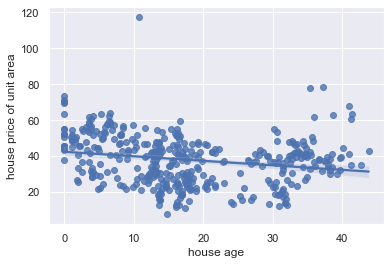

In [56]:
sns.regplot(x="house age", y="house price of unit area", data = real_estate)

In [57]:
real_estate.columns

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area'],
      dtype='object')

In [59]:
df1=real_estate[['distance to the nearest MRT station', 'house price of unit area']]

In [60]:
df1

,distance to the nearest MRT station,house price of unit area
0,84.87882,37.9
1,306.59470,42.2
2,561.98450,47.3
3,561.98450,54.8
4,390.56840,43.1
...,...,...
409,4082.01500,15.4
410,90.45606,50.0
411,390.96960,40.6
412,104.81010,52.5


In [36]:
x = df1["distance to the nearest MRT station"]

In [61]:
y = df1["house price of unit area"]

In [62]:
model = LinearRegression()

In [63]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [64]:
model.intercept_

45.851427057774984

In [65]:
model.coef_ 

array([-0.00726205])

In [66]:
model.score(np.array(x).reshape(-1,1),y)

0.45375427891826703

In [67]:
X = real_estate["house age"].values
Y = real_estate["house price of unit area"].values

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state = 24)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)


In [69]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
y_predict = model.predict(x_test)

In [71]:
train_accuracy = model.score(x_train, y_train)
train_accuracy

0.03519004670890158

Multiple Linear Regression

In [79]:
df2 = pd.read_csv("/Users/ashlythampi/Downloads/SEM 2/BD2P3/Real estate.csv")
df2

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [80]:
real_estate.columns 

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area'],
      dtype='object')

In [81]:
X = df2[["X1 transaction date","X2 house age", "X4 number of convenience stores"]]
y = df2["Y house price of unit area"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [83]:
model = LinearRegression()

In [84]:
model.fit(X_train, y_train)

LinearRegression()

In [85]:
model.intercept_

-4812.091171411587

In [87]:
model.score(X_train, y_train)

0.37194898219341366

In [88]:
model.predict(X_test)

array([45.18779688, 35.19829257, 22.11199614, 27.58292527, 26.33077078,
       38.86980726, 45.94611695, 41.95153645, 30.01455777, 33.81153318,
       22.31413579, 26.75153161, 37.04720692, 35.7548701 , 27.38215365,
       47.07897038, 40.93020793, 28.16512421, 28.5436259 , 34.7474774 ,
       39.85147265, 54.09032516, 28.04432014, 48.47211742, 30.5957183 ,
       47.64153846, 53.20946999, 40.21903165, 21.73349445, 39.56216309,
       51.35951723, 38.51199204, 47.33777389, 39.47245176, 45.70142267,
       54.57119467, 32.69486579, 35.93519617, 23.85341711, 30.42460391,
       52.66797259, 39.98292391, 30.36830304, 43.11127768, 44.80353266,
       54.43208934, 29.74303026, 35.39369877, 41.8109956 , 46.86703236,
       35.71797639, 48.26997777, 28.57742057, 33.09126731, 33.61830971,
       42.17682358, 30.39357866, 30.8781885 , 38.26982627, 40.63018368,
       47.16809501, 43.5432049 , 34.38682526, 39.33559665, 34.38578686,
       40.73151311, 46.86478214, 47.06676559, 29.46810822, 44.80

In [89]:
y_test.values

array([50.4, 28.1, 13.7, 25.3, 22.3, 40.3, 78. , 47. , 43.9, 25.6, 13.8,
       23. , 37.7, 42.5, 18.6, 63.2, 42.3, 20.7, 24.7, 29.4, 41.5, 58.1,
       31.5, 73.6, 37.3, 47.1, 56.3, 42.5, 38.4, 34.3, 57.8, 21.7, 54.4,
       41. , 43.7, 44.8, 27.3, 21.8, 39.7, 38.8, 53.5, 40.3, 61.5, 49.3,
       78.3, 63.9, 24.8, 23.8, 38.1, 45.7, 20.9, 69.7, 27. , 23.5, 37.8,
       41. , 28.5, 36.5, 38.2, 51.4, 50.7, 40.6, 27.7, 36.2, 27.7, 40.1,
       57.4, 71. , 46.6, 55.1, 26.5, 36.3, 42.9, 59. , 25.9, 45.5, 43.5,
       29.5, 27.3, 42.2, 12.8, 39.5, 31.3])

In [90]:
model.score(X_test, model.predict(X_test))

1.0

In [91]:
model.score(X_train, model.predict(X_train))

1.0